In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Part A.

In [2]:
dataset=load_digits()

In [3]:
df=pd.DataFrame(dataset.data,columns=range(0,64))
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
X=df
Y=dataset.target

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=44)

Standardization test and training datasets: 

In [6]:
mean=np.asanyarray(X_train.mean())
std=np.asanyarray(X_train.std())

Standardize test data with mean and std of training data.

In [7]:
X_test_sub=X_test.sub(mean,axis='columns')
X_test_stnd=X_test_sub.div(std,axis='columns')  

Standardize trainig data.

In [8]:
scaler=StandardScaler()
X_train_stnd=scaler.fit_transform(X_train)

In [9]:
X_test_stnd.fillna(0,inplace=True)

# LDA Classification

In [10]:
lda=LDA()
lda.fit(X_train_stnd, y_train)
print('LDA Score (or Accuracy): ',lda.score(X_test_stnd,y_test))

LDA Score (or Accuracy):  0.9666666666666667


# QDA Classification

In [11]:
qda=QDA()
qda.fit(X_train_stnd, y_train)
print('QDA Score (or Accuracy): ',qda.score(X_test_stnd,y_test))

QDA Score (or Accuracy):  0.10833333333333334


D:\Users\ASUS-C\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Classification Using KNN

In [12]:
knn=KNN(n_neighbors=5)
knn.fit(X_train_stnd, y_train)
print('KNN Score (or Accuracy): ',knn.score(X_test_stnd,y_test))

KNN Score (or Accuracy):  0.9861111111111112


KNN is the best classifier among these. QDA does not perform well because boundries aren't quadratic.

# Plotting KNN Test Error Versus Different K-Neighbours

In [13]:
knn_scores=[]
knn_acc=[]

In [14]:
for i in range(2,11):
    knn_=KNN(n_neighbors=i)
    knn_.fit(X_train_stnd, y_train)
    knn_scores.append(knn_.score(X_test_stnd,y_test))
    

Text(0.5, 1.0, 'KNN versus Number of Neighbors')

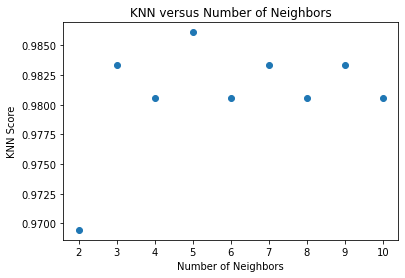

In [15]:
plt.plot(range(2,11),knn_scores,'o')
plt.xlabel('Number of Neighbors')
plt.ylabel('KNN Score')
plt.title('KNN versus Number of Neighbors')

# Plotting LDA Test Error Versus Different n Components

In [16]:
lda_scores=[]

In [17]:
for i in range(1,10):
    lda1=LDA(n_components=i)
    X_train_stnd_trans=lda1.fit_transform(X_train_stnd, y_train)
    X_test_stnd_trans=lda1.transform(X_test_stnd)

    lda1_=LDA()
    lda1_.fit(X_train_stnd_trans, y_train)
    lda_scores.append(lda1_.score(X_test_stnd_trans,y_test))

Text(0.5, 1.0, 'LDA versus Number of Components')

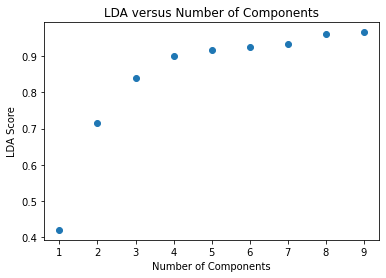

In [18]:
plt.plot(range(1,10),lda_scores,'o')
plt.xlabel('Number of Components')
plt.ylabel('LDA Score')
plt.title('LDA versus Number of Components')

# Part B.

Dimension Reduction Using LDA then Classifying with KNN

In [19]:
lda__knn=[]

for i in range(1,10):
    lda_knn=[]
    lda1=LDA(n_components=i)
    X_train_stnd_trans=lda1.fit_transform(X_train_stnd, y_train)
    X_test_stnd_trans=lda1.transform(X_test_stnd)
    for j in range(2,11):
        knn_=KNN(n_neighbors=j)
        knn_.fit(X_train_stnd_trans, y_train)
        lda_knn.append(knn_.score(X_test_stnd_trans,y_test))
        
    lda__knn.append(lda_knn)    

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

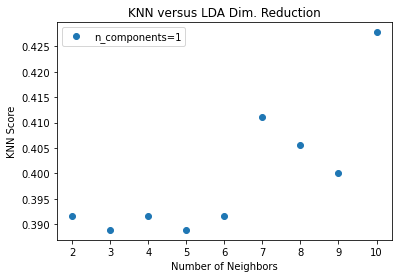

In [20]:
plt.plot(range(2,11),lda__knn[0],'o',label='n_components=1')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper left')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

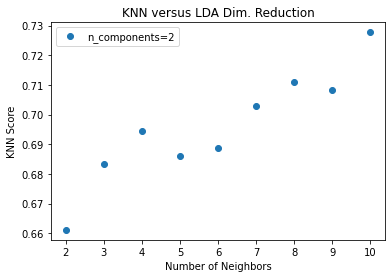

In [21]:
plt.plot(range(2,11),lda__knn[1],'o',label='n_components=2')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper left')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

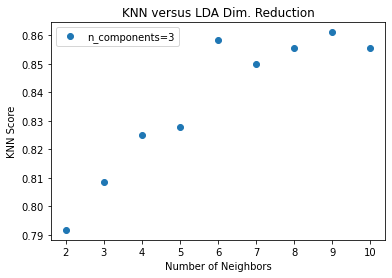

In [22]:
plt.plot(range(2,11),lda__knn[2],'o',label='n_components=3')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper left')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

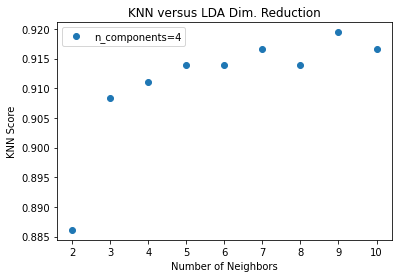

In [23]:
plt.plot(range(2,11),lda__knn[3],'o',label='n_components=4')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper left')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

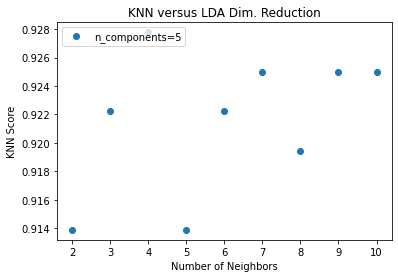

In [24]:
plt.plot(range(2,11),lda__knn[4],'o',label='n_components=5')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper left')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

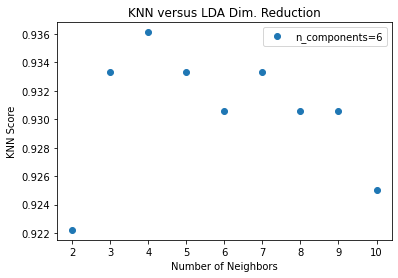

In [25]:
plt.plot(range(2,11),lda__knn[5],'o',label='n_components=6')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

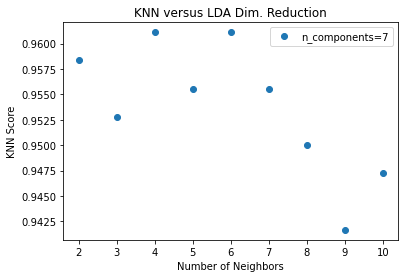

In [26]:
plt.plot(range(2,11),lda__knn[6],'o',label='n_components=7')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

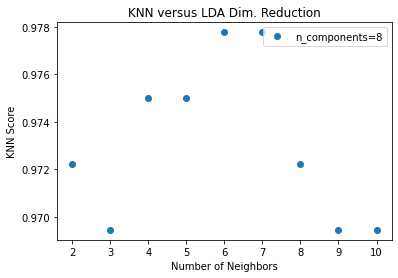

In [27]:
plt.plot(range(2,11),lda__knn[7],'o',label='n_components=8')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus LDA Dim. Reduction')

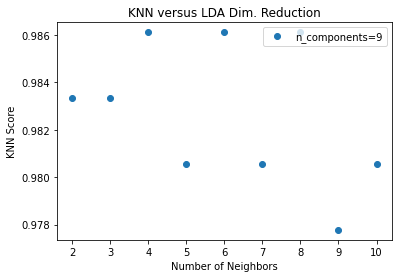

In [28]:
plt.plot(range(2,11),lda__knn[8],'o',label='n_components=9')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus LDA Dim. Reduction')

Dimension Reduction Using PCA then Classifying with KNN

In [29]:
pca__knn=[]

for i in range(1,10):
    pca_knn=[]
    pca1=PCA(n_components=i)
    X_train_stnd_trans=pca1.fit_transform(X_train_stnd, y_train)
    X_test_stnd_trans=pca1.transform(X_test_stnd)
    for j in range(2,11):
        knn_=KNN(n_neighbors=j)
        knn_.fit(X_train_stnd_trans, y_train)
        pca_knn.append(knn_.score(X_test_stnd_trans,y_test))
        
    pca__knn.append(pca_knn) 

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

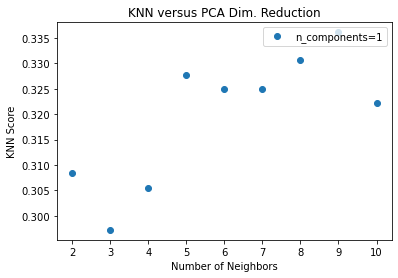

In [30]:
plt.plot(range(2,11),pca__knn[0],'o',label='n_components=1')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

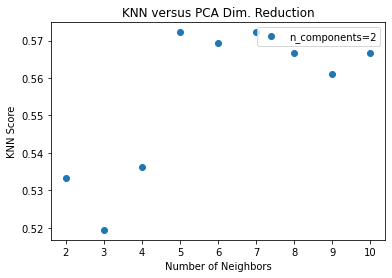

In [31]:
plt.plot(range(2,11),pca__knn[1],'o',label='n_components=2')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

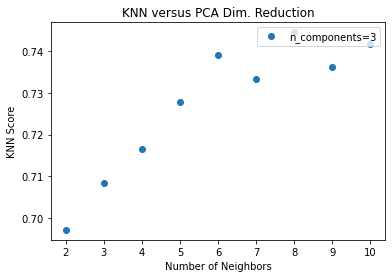

In [32]:
plt.plot(range(2,11),pca__knn[2],'o',label='n_components=3')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

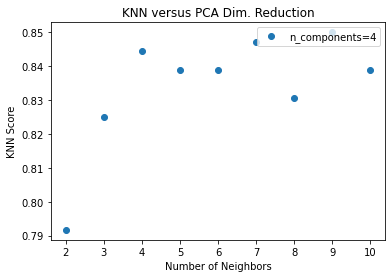

In [33]:
plt.plot(range(2,11),pca__knn[3],'o',label='n_components=4')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

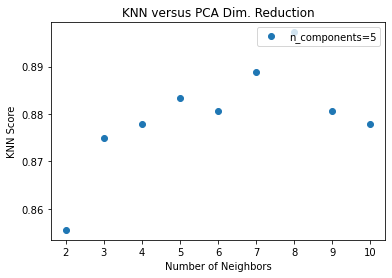

In [34]:
plt.plot(range(2,11),pca__knn[4],'o',label='n_components=5')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

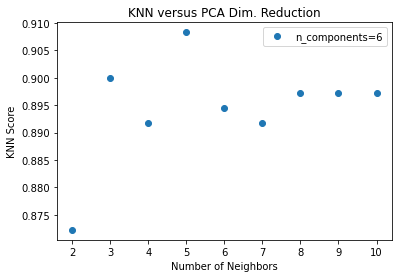

In [35]:
plt.plot(range(2,11),pca__knn[5],'o',label='n_components=6')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

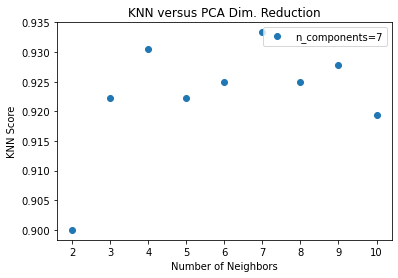

In [36]:
plt.plot(range(2,11),pca__knn[6],'o',label='n_components=7')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

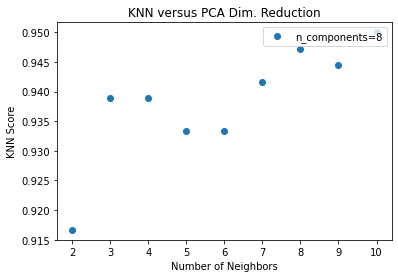

In [37]:
plt.plot(range(2,11),pca__knn[7],'o',label='n_components=8')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

Text(0.5, 1.0, 'KNN versus PCA Dim. Reduction')

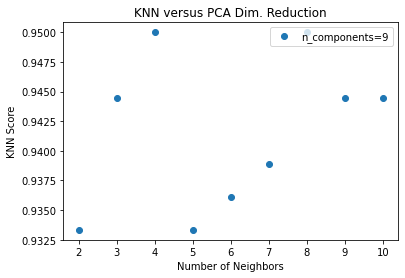

In [38]:
plt.plot(range(2,11),pca__knn[8],'o',label='n_components=9')
plt.xlabel('Number of Neighbors')
plt.legend(loc='upper right')
plt.ylabel('KNN Score')
plt.title('KNN versus PCA Dim. Reduction')

# Part C.

Attached File named 'توضیحات تکمیلی سوال 7'.